In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Decision Tree

In [5]:
df = pd.read_csv(r'C:\Users\noemi\Documents\GitHub\Data-mining-project\datasets_final\final_dataset.csv')

In [6]:
df.head()

,region,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popular
0,3,0.685,0.644,10,-13.206,0,0.1550,0.302,0.000055,0.1140,0.808,164.919,169379,4,0
1,3,0.752,0.620,5,-5.536,1,0.0509,0.309,0.000000,0.0750,0.962,117.399,164459,4,0
2,1,0.748,0.627,7,-6.029,1,0.0639,0.131,0.000000,0.0852,0.524,120.963,188491,4,0
3,2,0.748,0.627,7,-6.029,1,0.0639,0.131,0.000000,0.0852,0.524,120.963,188491,4,0
4,3,0.748,0.627,7,-6.029,1,0.0639,0.131,0.000000,0.0852,0.524,120.963,188491,4,0


In [29]:
# X contains the features and y contains the target(popular)
X = df.drop('popular', axis=1)  # Drop the target column, keeping only features
y = df['popular']  # Target variable (1 for popular, 0 for not popular)

In [7]:
#Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
#Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42) 
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
# Make predictions on the test set
y_pred = clf.predict(X_test)


In [11]:
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [12]:
# Output results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 75.97%
Confusion Matrix:
[[46968  8372]
 [ 7239  2374]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     55340
           1       0.22      0.25      0.23      9613

    accuracy                           0.76     64953
   macro avg       0.54      0.55      0.55     64953
weighted avg       0.77      0.76      0.77     64953



The confusion matrix isn't bad, but it shows a better performance to predict non popular songs rather than popular ones. This is due to class imbalancing

In [12]:
# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


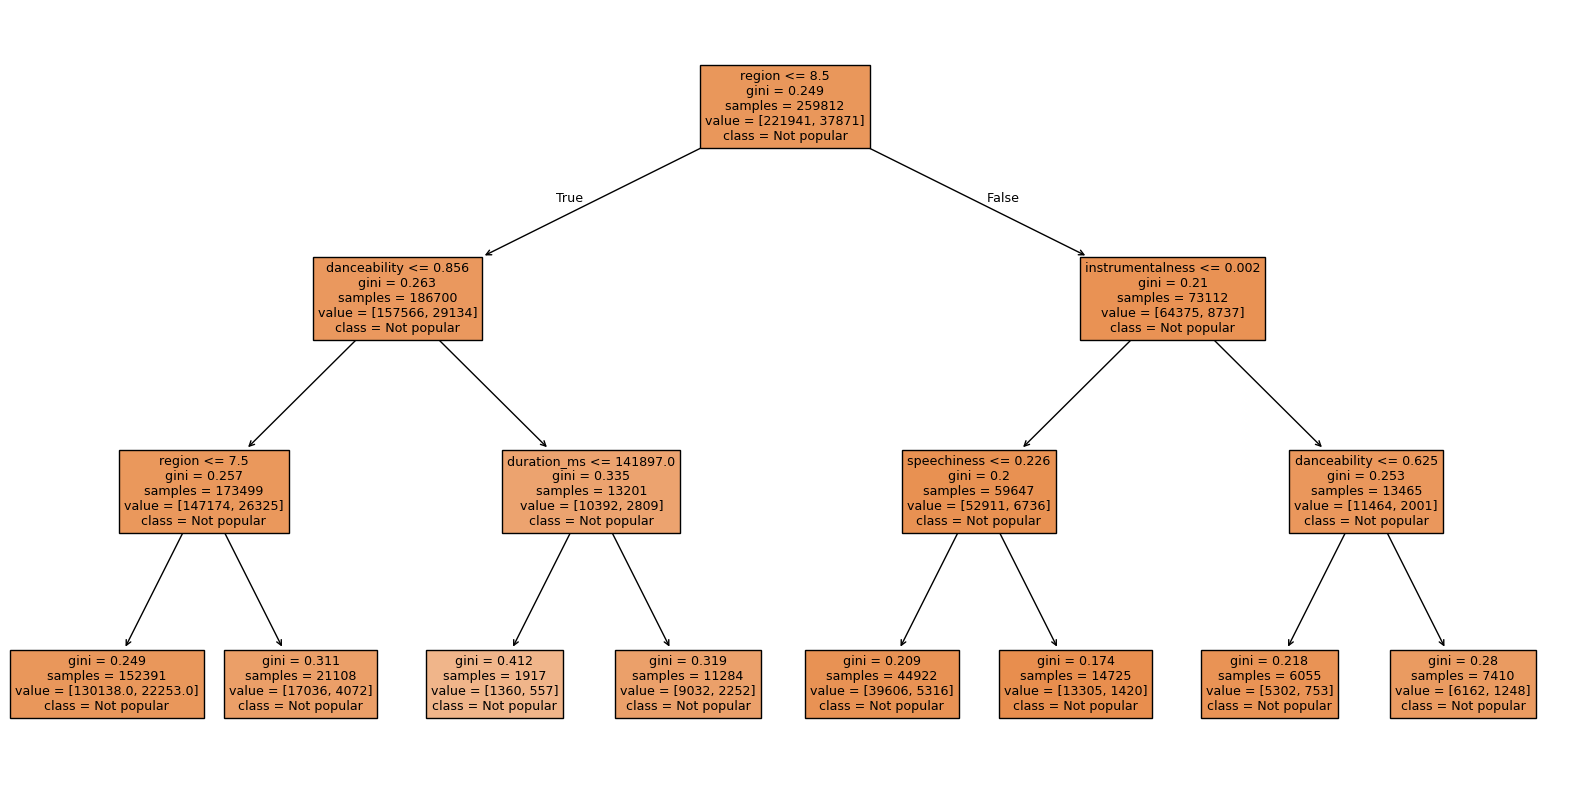

In [13]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # Set max depth
clf.fit(X_train, y_train)  # Fit the model on the training data

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not popular', 'Popular'])
plt.show()

In [15]:
import seaborn as sns

In [16]:
def evaluation_of_classifier(clf, xtrain, ytrain, xtest, ytest, clf_name):
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    print(f"Classification Report for {clf_name}:")
    print(classification_report(ytest, ypred))
    accuracy_val = accuracy_score(ytest, ypred)
    print(f'{clf_name} Validation Accuracy: {accuracy_val:.2%}')
    conf_matrix = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.show()

In [17]:
decision_t=DecisionTreeClassifier()

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     55340
           1       0.22      0.24      0.23      9613

    accuracy                           0.76     64953
   macro avg       0.54      0.55      0.55     64953
weighted avg       0.77      0.76      0.77     64953

Decision Tree Validation Accuracy: 76.06%


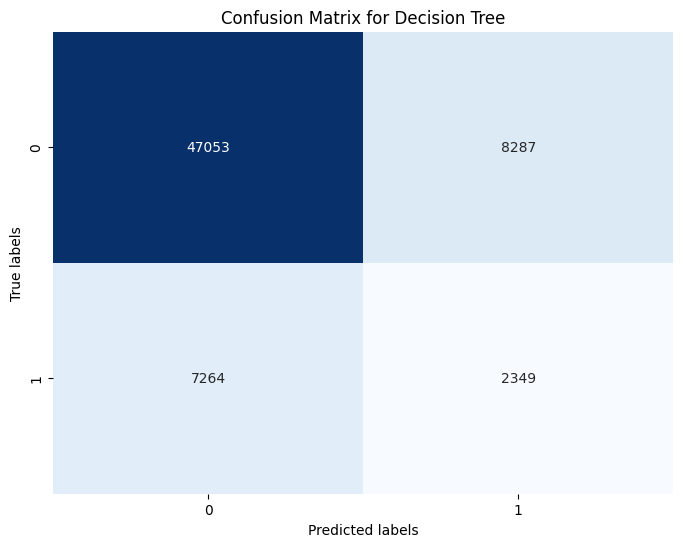

In [18]:
evaluation_of_classifier(decision_t, X_train, y_train, X_test, y_test, "Decision Tree")

Let's address class imbalance

Oversampling using SMOTE

In [8]:
from imblearn.over_sampling import SMOTE

In [24]:
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)


In [25]:
# Train and evaluate the Decision Tree on the oversampled data
clf.fit(X_train_oversampled, y_train_oversampled)
y_pred_oversampled = clf.predict(X_test)
print("\nOversampled Data Results (SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_oversampled))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_oversampled))
print("Classification Report:\n", classification_report(y_test, y_pred_oversampled))



Oversampled Data Results (SMOTE):
Accuracy: 0.6864809939494712
Confusion Matrix:
 [[40544 14796]
 [ 5568  4045]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.73      0.80     55340
           1       0.21      0.42      0.28      9613

    accuracy                           0.69     64953
   macro avg       0.55      0.58      0.54     64953
weighted avg       0.78      0.69      0.72     64953



In [18]:
import seaborn as sns

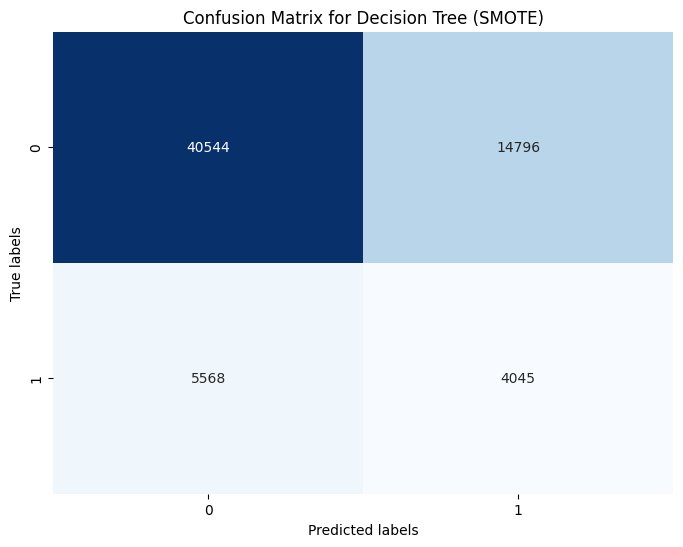

In [19]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_oversampled), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Decision Tree (SMOTE)')
plt.show()

The results are better now that we addressed class imbalance

Let's also try undersampling using RandomUnderSampler to compare

In [20]:
from imblearn.under_sampling import RandomUnderSampler


In [21]:
undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)


In [22]:
# Train and evaluate the Decision Tree on the undersampled data
clf.fit(X_train_undersampled, y_train_undersampled)
y_pred_undersampled = clf.predict(X_test)
print("\nUndersampled Data Results (Random UnderSampling):")
print("Accuracy:", accuracy_score(y_test, y_pred_undersampled))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_undersampled))
print("Classification Report:\n", classification_report(y_test, y_pred_undersampled))



Undersampled Data Results (Random UnderSampling):
Accuracy: 0.5338783428017182
Confusion Matrix:
 [[29363 25977]
 [ 4299  5314]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.53      0.66     55340
           1       0.17      0.55      0.26      9613

    accuracy                           0.53     64953
   macro avg       0.52      0.54      0.46     64953
weighted avg       0.77      0.53      0.60     64953



In this case, undersampling is better for predicting popular songs, but for non popular songs the results get worse. That's why the oversampling result is preferred.

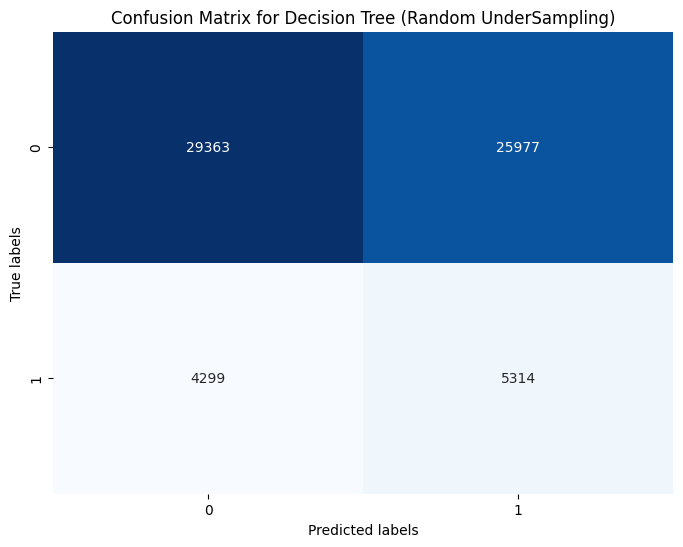

In [23]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_undersampled), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Decision Tree (Random UnderSampling)')
plt.show()

Feature importance using the oversampled model

Global feature importance

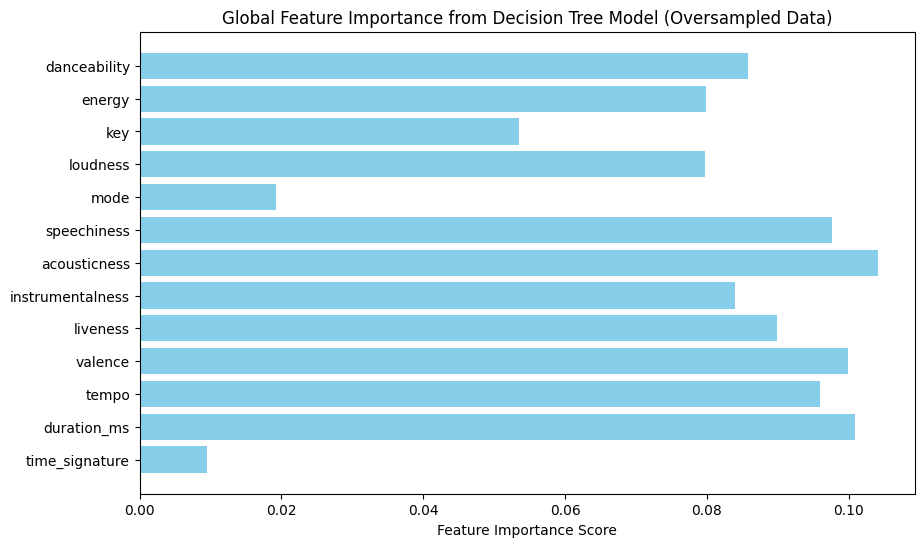

In [27]:
feature_names = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
'acousticness', 'instrumentalness', 'liveness', 'valence', 
'tempo', 'duration_ms', 'time_signature']

# Drop 'region' from the features
X = X.drop(columns=['region'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Train a Decision Tree model on the oversampled data
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_oversampled, y_train_oversampled)

# Get feature importance scores
feature_importances = dt.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance Score")
plt.title("Global Feature Importance from Decision Tree Model (Oversampled Data)")
plt.gca().invert_yaxis()  # To have the highest importance feature at the top
plt.show()


Regional feature importance

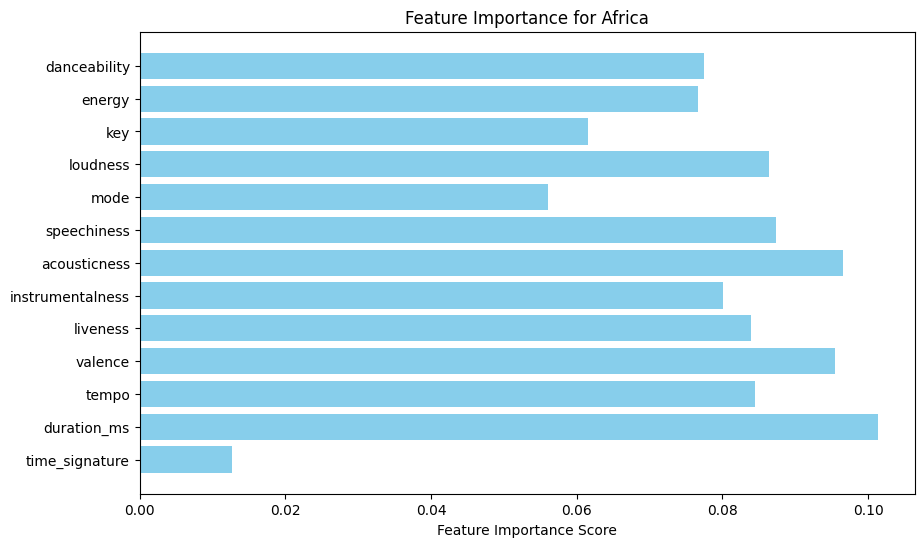

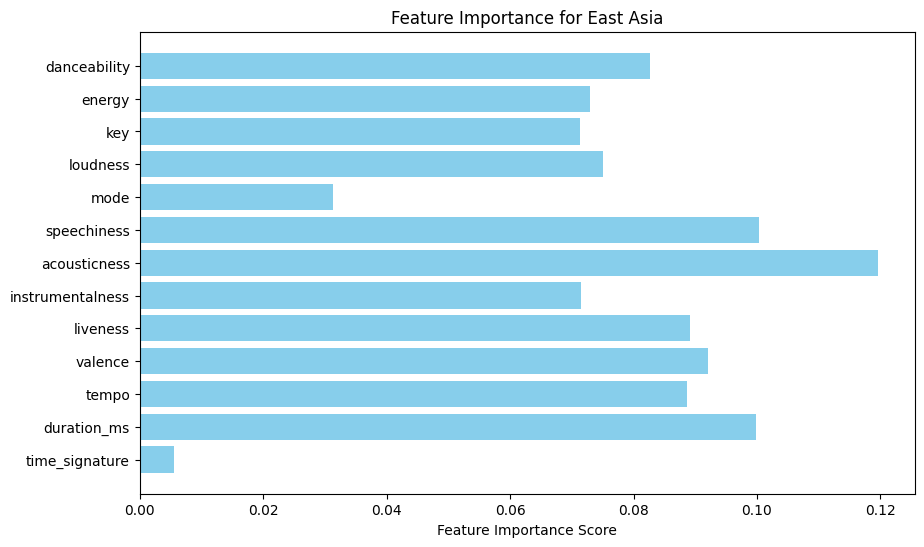

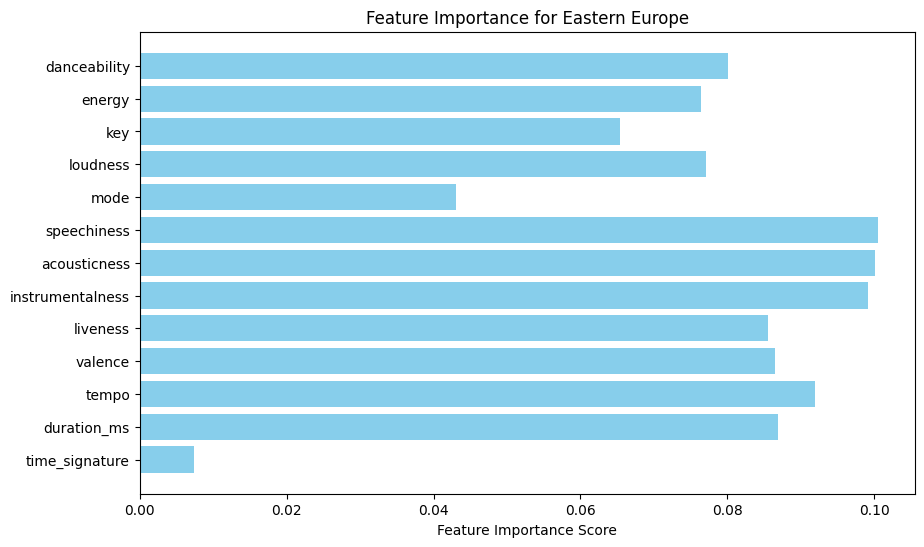

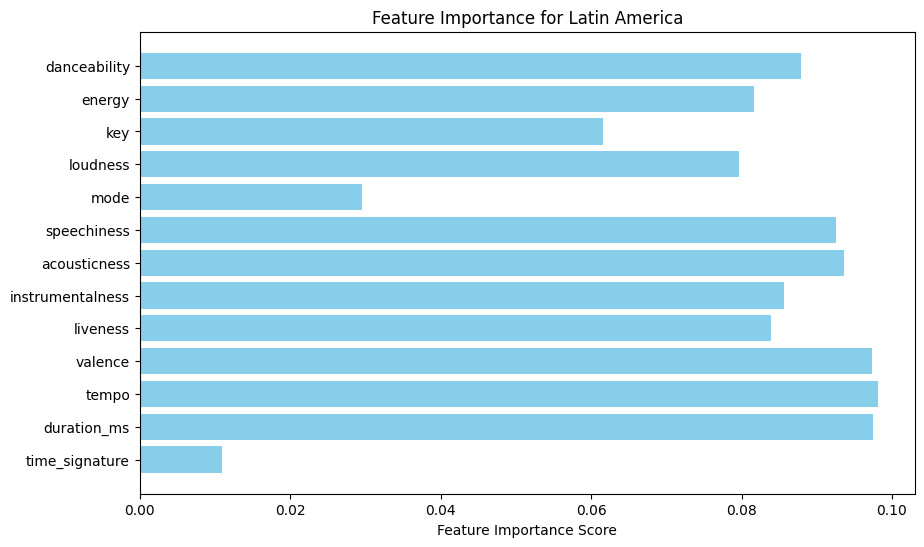

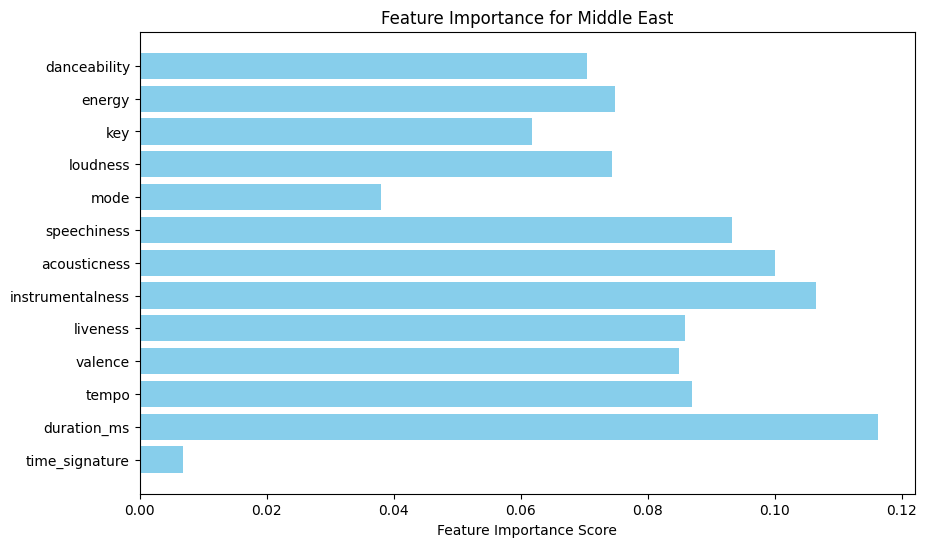

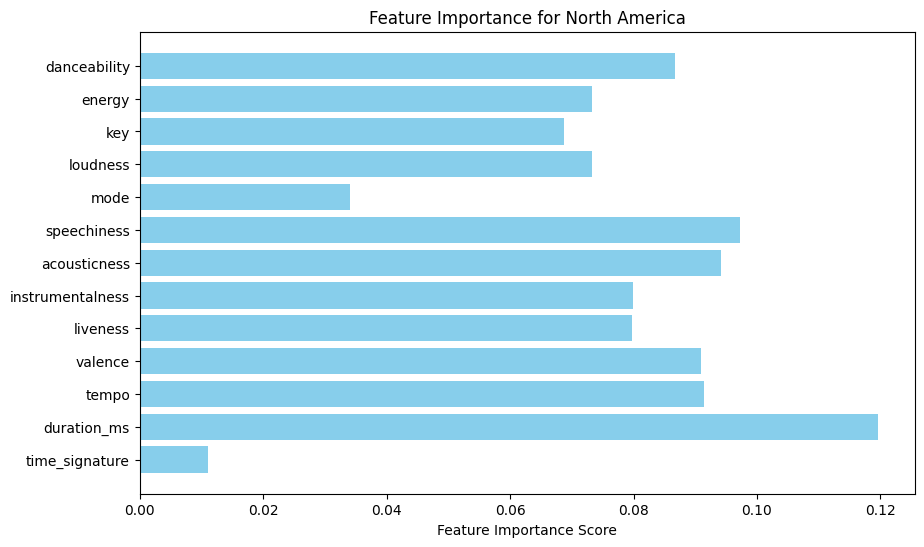

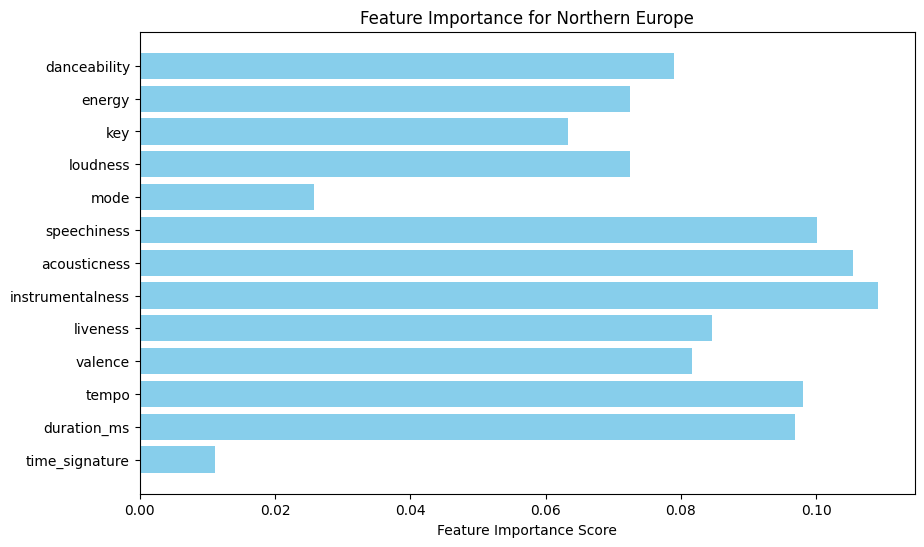

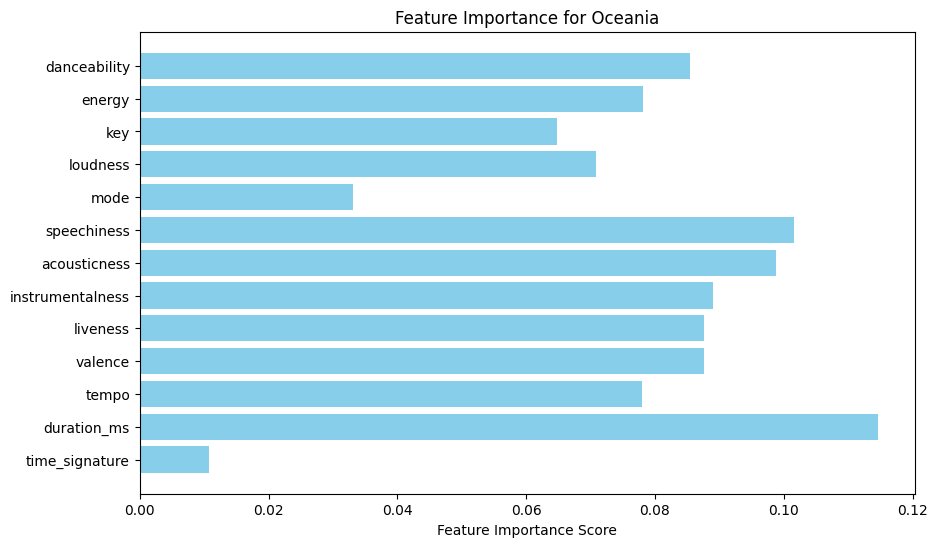

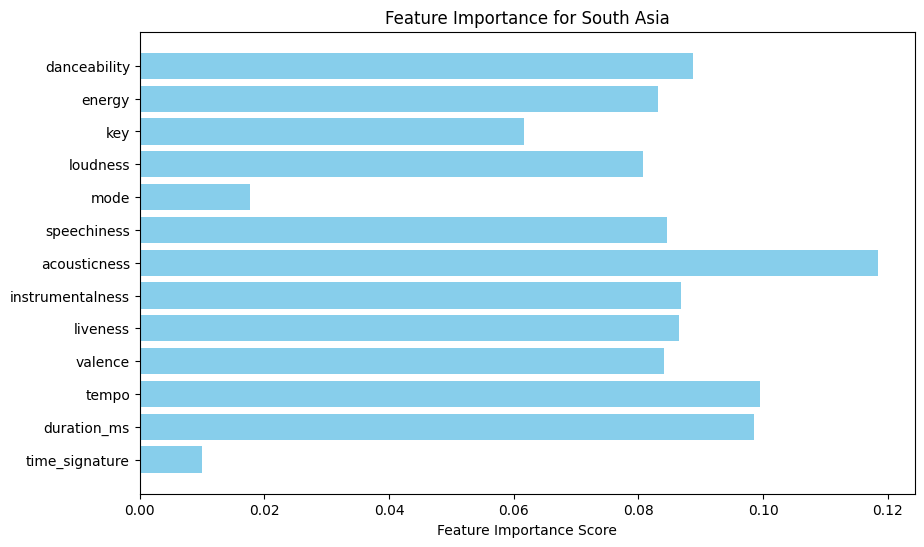

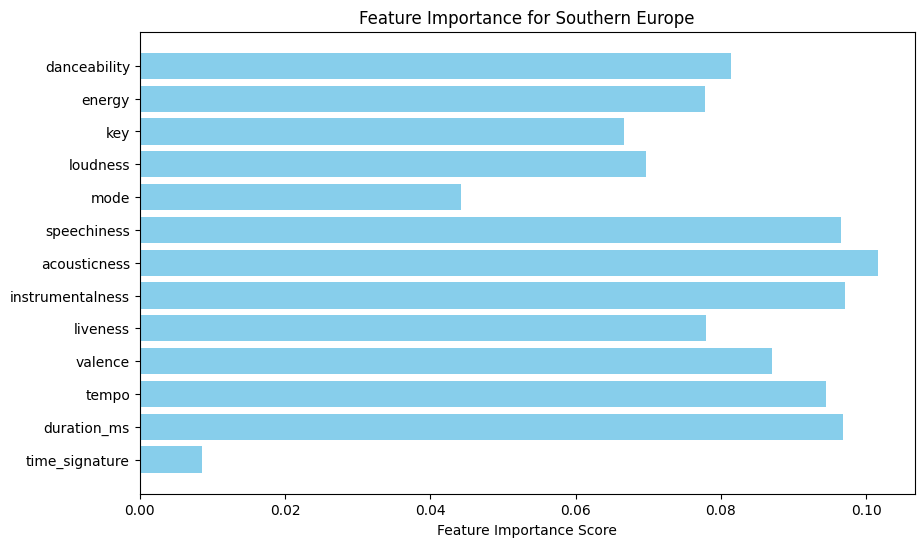

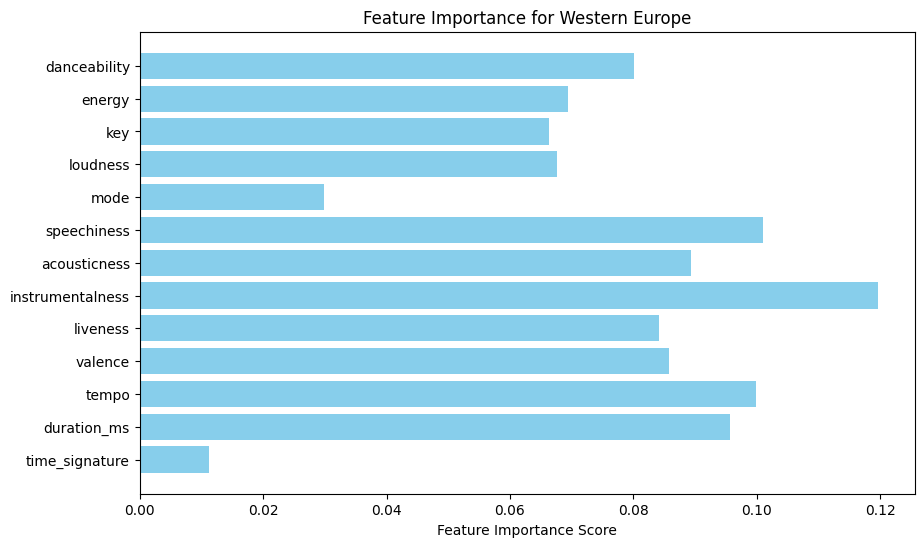

In [30]:
# Define region encoding 
region_encoding = {
    'Africa': 0, 'East Asia': 1, 'Eastern Europe': 2, 'Latin America': 3, 
    'Middle East': 4, 'North America': 5, 'Northern Europe': 6, 
    'Oceania': 7, 'South Asia': 8, 'Southern Europe': 9, 'Western Europe': 10
}
region_names = {v: k for k, v in region_encoding.items()}

feature_names = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                 'acousticness', 'instrumentalness', 'liveness', 'valence', 
                 'tempo', 'duration_ms', 'time_signature']

# Loop over each region to calculate and plot feature importance
for region_code, region_name in region_names.items():
    # Filter the data for the current region
    X_region = X[X['region'] == region_code].drop(columns=['region'])  # Drop 'region' column
    y_region = y[X['region'] == region_code]

    # Check if there are enough samples in this region to apply SMOTE
    if y_region.value_counts().min() < 6:  # Skip if there are too few samples to avoid SMOTE issues
        print(f"Skipping region {region_name} due to insufficient samples.")
        continue

    # Apply SMOTE to oversample the minority class for the current region
    smote = SMOTE(random_state=42)
    X_region_oversampled, y_region_oversampled = smote.fit_resample(X_region, y_region)

    # Train a Decision Tree model for the current region
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_region_oversampled, y_region_oversampled)

    # Get feature importance scores for the current region
    feature_importances = dt.feature_importances_

    # Plot feature importance for the current region
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, feature_importances, color='skyblue')
    plt.xlabel("Feature Importance Score")
    plt.title(f"Feature Importance for {region_name}")
    plt.gca().invert_yaxis()  # Highest importance at the top
    plt.show()
